In [1]:
import os
import pandas as pd
import re
i = 0
filepaths = []
# "C:/Users/janja/Desktop/firstData"
for root, dirs, files in os.walk("C:/Users/janja/OneDrive/Pulpit/DaneMGR", topdown=True):
    for name in dirs:
        if (bool(re.findall('\d$', name)) == False):
            Path = (root + '/' + name)
            filepaths.append(re.sub('DaneMGR\\\\', 'DaneMGR/', Path))

In [2]:
from os import walk
filenameList = []
fullPath = []
for Path in filepaths:
    for (dirpath, dirnames, filenames) in walk(Path):
        print(filenames)
        for name in filenames:
            if (bool(re.findall('fast_Unknown', name)) == True) and name not in filenameList:
                NewName = re.sub('._CsvLog', 'CsvLog', name)
                filenameList.append(NewName)
                fullPath.append(Path + '/' + NewName)

['._1-B.txt', '._CsvLogBase_2022-01-15_191202.371_slow_Measurement.csv', '1-B.txt', 'CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv', 'CsvLogBase_2022-01-15_191202.371_slow_AlarmSetting.csv', 'CsvLogBase_2022-01-15_191202.371_slow_AlarmState.csv', 'CsvLogBase_2022-01-15_191202.371_slow_Measurement.csv', 'CsvLogBase_2022-01-15_191202.371_slow_Text.csv']
['._CsvLogBase_2022-01-15_235231.870_slow_Measurement.csv', '1-R.txt', 'CsvLogBase_2022-01-15_235231.870_fast_Unknown.csv', 'CsvLogBase_2022-01-15_235231.870_slow_AlarmSetting.csv', 'CsvLogBase_2022-01-15_235231.870_slow_AlarmState.csv', 'CsvLogBase_2022-01-15_235231.870_slow_Measurement.csv', 'CsvLogBase_2022-01-15_235231.870_slow_Text.csv']
['._CsvLogBase_2022-03-22_190208.416_slow_Measurement.csv', '10-B.txt', 'CsvLogBase_2022-03-22_190208.416_fast_Unknown.csv', 'CsvLogBase_2022-03-22_190208.416_slow_AlarmSetting.csv', 'CsvLogBase_2022-03-22_190208.416_slow_AlarmState.csv', 'CsvLogBase_2022-03-22_190208.416_slow_Measurement.csv', '

In [3]:
print(filepaths)
print('\n')
print(filenameList)
print('\n')
print(fullPath) 

['C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/10/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/11/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/12/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/13/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/13/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/14/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/14/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/15/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/15/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/16/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/16/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/17/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/17/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/18/B', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/18/R', 'C:/Users/janja/OneDrive/Pulpit/DaneMGR/19/B', 'C:/Users/janj

In [4]:
'''
df = pd.DataFrame()
i = 0
for path in fullPath:
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8')
    print(df_local)
    match = re.findall("/B/Csv",path)
    boolean = bool(match)
    print(boolean)
    if boolean == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    # print(df_local)
    i += 1
    print(i)
    df = df.append(df_local)
'''



'\ndf = pd.DataFrame()\ni = 0\nfor path in fullPath:\n    df_local = pd.read_csv(path, sep = \',\', encoding = \'UTF-8\')\n    print(df_local)\n    match = re.findall("/B/Csv",path)\n    boolean = bool(match)\n    print(boolean)\n    if boolean == True:\n        df_local[\'position\'] = 1\n    else:\n        df_local[\'position\'] = 0\n    # print(df_local)\n    i += 1\n    print(i)\n    df = df.append(df_local)\n'

In [5]:
T = 200 # describes which rows multiplied by n should be taken into the dataset
fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
df = pd.DataFrame()
for path in fullPath:
    print(path)
    df_local = pd.read_csv(path, sep = ',', encoding = 'UTF-8', usecols=fields)
    df_local = df_local[df_local.index % T == 0] #Set to 2000 as 1 second is 20 observations
    match = re.findall("/B/Csv",path)
    if bool(match) == True:
        df_local['position'] = 1
    else:
        df_local['position'] = 0
    neo = re.findall('\/([\d]{1,2})\/', path)
    df_local.insert(0,'neonate', str(neo))
    print(df_local)
    df = df.append(df_local)

C:/Users/janja/OneDrive/Pulpit/DaneMGR/1/B/CsvLogBase_2022-01-15_191202.371_fast_Unknown.csv
        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['1']                                 -0.155   
200       ['1']                                 -0.112   
400       ['1']                                  0.593   
600       ['1']                                 -0.238   
800       ['1']                                 -0.125   
...         ...                                    ...   
2985600   ['1']                                    NaN   
2985800   ['1']                                    NaN   
2986000   ['1']                                    NaN   
2986200   ['1']                                    NaN   
2986400   ['1']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -45.0         1  
200                                  138.0         1  
400                                 -156.0   

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['12']                                  0.290   
200      ['12']                                  0.474   
400      ['12']                                 -0.425   
600      ['12']                                 -0.027   
800      ['12']                                 -0.009   
...         ...                                    ...   
2266400  ['12']                                    NaN   
2266600  ['12']                                    NaN   
2266800  ['12']                                    NaN   
2267000  ['12']                                    NaN   
2267200  ['12']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     66.0         1  
200                                 -133.0         1  
400                                  -54.0         1  
600                                 -190.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['15']                                 -0.286   
200      ['15']                                  0.175   
400      ['15']                                  0.865   
600      ['15']                                 -0.048   
800      ['15']                                 -0.372   
...         ...                                    ...   
2210200  ['15']                                    NaN   
2210400  ['15']                                    NaN   
2210600  ['15']                                    NaN   
2210800  ['15']                                    NaN   
2211000  ['15']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    181.0         1  
200                                  -38.0         1  
400                                 -130.0         1  
600                                   71.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['18']                                 -0.930   
200      ['18']                                  0.391   
400      ['18']                                  1.495   
600      ['18']                                 -1.264   
800      ['18']                                 -4.296   
...         ...                                    ...   
3071000  ['18']                                    NaN   
3071200  ['18']                                    NaN   
3071400  ['18']                                    NaN   
3071600  ['18']                                    NaN   
3071800  ['18']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -41.0         1  
200                                 -216.0         1  
400                                  257.0         1  
600                                -1148.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['20']                                  0.228   
200      ['20']                                 -0.837   
400      ['20']                                 -0.178   
600      ['20']                                 -0.086   
800      ['20']                                  0.123   
...         ...                                    ...   
1796600  ['20']                                    NaN   
1796800  ['20']                                    NaN   
1797000  ['20']                                    NaN   
1797200  ['20']                                    NaN   
1797400  ['20']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     32.0         1  
200                                 -720.0         1  
400                                  134.0         1  
600                                  221.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['23']                                    NaN   
200      ['23']                                  0.343   
400      ['23']                                 -0.244   
600      ['23']                                 -0.116   
800      ['23']                                 -0.102   
...         ...                                    ...   
3040000  ['23']                                    NaN   
3040200  ['23']                                    NaN   
3040400  ['23']                                    NaN   
3040600  ['23']                                    NaN   
3040800  ['23']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      NaN         1  
200                                    0.0         1  
400                                    0.0         1  
600                                    0.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['26']                                  0.155   
200      ['26']                                 -0.174   
400      ['26']                                 -0.084   
600      ['26']                                  0.053   
800      ['26']                                  0.150   
...         ...                                    ...   
2122000  ['26']                                    NaN   
2122200  ['26']                                    NaN   
2122400  ['26']                                    NaN   
2122600  ['26']                                    NaN   
2122800  ['26']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    -56.0         1  
200                                 -151.0         1  
400                                  471.0         1  
600                                   54.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['29']                                  0.423   
200      ['29']                                  0.855   
400      ['29']                                 -0.835   
600      ['29']                                 -0.549   
800      ['29']                                 -0.073   
...         ...                                    ...   
2886000  ['29']                                    NaN   
2886200  ['29']                                    NaN   
2886400  ['29']                                    NaN   
2886600  ['29']                                    NaN   
2886800  ['29']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                      7.0         1  
200                                  -27.0         1  
400                                  -33.0         1  
600                                   64.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['31']                                  0.085   
200      ['31']                                  0.015   
400      ['31']                                  0.005   
600      ['31']                                  0.098   
800      ['31']                                 -0.640   
...         ...                                    ...   
3064400  ['31']                                    NaN   
3064600  ['31']                                    NaN   
3064800  ['31']                                    NaN   
3065000  ['31']                                    NaN   
3065200  ['31']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     14.0         1  
200                                  -53.0         1  
400                                  -52.0         1  
600                                  130.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['34']                                 -0.023   
200      ['34']                                 -0.057   
400      ['34']                                  0.090   
600      ['34']                                  0.072   
800      ['34']                                 -0.088   
...         ...                                    ...   
2885200  ['34']                                    NaN   
2885400  ['34']                                    NaN   
2885600  ['34']                                    NaN   
2885800  ['34']                                    NaN   
2886000  ['34']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    130.0         1  
200                                  -24.0         1  
400                                   51.0         1  
600                                   57.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['37']                                 -0.681   
200      ['37']                                 -0.485   
400      ['37']                                 -0.341   
600      ['37']                                  0.011   
800      ['37']                                  0.536   
...         ...                                    ...   
2884400  ['37']                                    NaN   
2884600  ['37']                                    NaN   
2884800  ['37']                                    NaN   
2885000  ['37']                                    NaN   
2885200  ['37']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -406.0         1  
200                                 -374.0         1  
400                                 -436.0         1  
600                                  -17.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['4']                                  0.983   
200       ['4']                                  0.189   
400       ['4']                                  0.297   
600       ['4']                                  0.288   
800       ['4']                                 -0.142   
...         ...                                    ...   
3063800   ['4']                                    NaN   
3064000   ['4']                                    NaN   
3064200   ['4']                                    NaN   
3064400   ['4']                                    NaN   
3064600   ['4']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                     24.0         1  
200                                 -901.0         1  
400                                  849.0         1  
600                                   15.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['42']                                  0.051   
200      ['42']                                  0.119   
400      ['42']                                 -0.213   
600      ['42']                                 -0.161   
800      ['42']                                 -0.026   
...         ...                                    ...   
2893600  ['42']                                    NaN   
2893800  ['42']                                    NaN   
2894000  ['42']                                    NaN   
2894200  ['42']                                    NaN   
2894400  ['42']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   -309.0         1  
200                                  -69.0         1  
400                                  100.0         1  
600                                 -158.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['45']                                 -0.062   
200      ['45']                                 -1.670   
400      ['45']                                  0.610   
600      ['45']                                  0.511   
800      ['45']                                 -1.256   
...         ...                                    ...   
3083200  ['45']                                    NaN   
3083400  ['45']                                    NaN   
3083600  ['45']                                    NaN   
3083800  ['45']                                    NaN   
3084000  ['45']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                   3247.0         1  
200                                 -841.0         1  
400                                  561.0         1  
600                                -1102.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0        ['49']                                 -0.580   
200      ['49']                                  3.109   
400      ['49']                                  1.533   
600      ['49']                                 -3.478   
800      ['49']                                 -1.302   
...         ...                                    ...   
2592200  ['49']                                    NaN   
2592400  ['49']                                    NaN   
2592600  ['49']                                    NaN   
2592800  ['49']                                    NaN   
2593000  ['49']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    518.0         1  
200                                 -767.0         1  
400                                 -348.0         1  
600                                -1095.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['6']                                 -0.349   
200       ['6']                                 -0.188   
400       ['6']                                 -0.060   
600       ['6']                                 -0.276   
800       ['6']                                  0.010   
...         ...                                    ...   
1933600   ['6']                                  0.381   
1933800   ['6']                                  0.178   
1934000   ['6']                                  0.275   
1934200   ['6']                                 -0.155   
1934400   ['6']                                 -0.181   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    178.0         1  
200                                  139.0         1  
400                                  -14.0         1  
600                                 -114.0         1  
800                         

        neonate  Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]  \
0         ['9']                                  1.299   
200       ['9']                                  2.077   
400       ['9']                                  2.179   
600       ['9']                                  0.296   
800       ['9']                                 -2.398   
...         ...                                    ...   
1934600   ['9']                                    NaN   
1934800   ['9']                                    NaN   
1935000   ['9']                                    NaN   
1935200   ['9']                                    NaN   
1935400   ['9']                                    NaN   

         Infinity|SPO2.SPO2_PULSE [COUNTS]  position  
0                                    146.0         1  
200                                   -6.0         1  
400                                  -44.0         1  
600                                  -96.0         1  
800                         

In [6]:
df

,neonate,Infinity|RESP.ONLY_ONE_IN_GROUP [OHM],Infinity|SPO2.SPO2_PULSE [COUNTS],position
0,['1'],-0.155,-45.0,1
200,['1'],-0.112,138.0,1
400,['1'],0.593,-156.0,1
600,['1'],-0.238,53.0,1
800,['1'],-0.125,-75.0,1
...,...,...,...,...
2787200,['9'],NaN,NaN,0
2787400,['9'],NaN,NaN,0
2787600,['9'],NaN,NaN,0
2787800,['9'],NaN,NaN,0


In [7]:
#df_Repaired = df.rename({'Infinity|ECG.ECG_LEAD_I [MICROVOLT]': 'ECG.ECG_LEAD_I[MICROVOLT]', 'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)#.dropna()
#FinalData = df_Repaired[['ECG.ECG_LEAD_I[MICROVOLT]', 'RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]']].copy()
#State = df_Repaired[['position']].copy()
df_Repaired = df.rename({'Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]': 'RESP.ONLY_ONE_IN_GROUP[OHM]','Infinity|SPO2.SPO2_PULSE [COUNTS]': 'SPO2.SPO2_PULSE[COUNTS]'}, axis=1)
FinalData = df_Repaired[['neonate','RESP.ONLY_ONE_IN_GROUP[OHM]', 'SPO2.SPO2_PULSE[COUNTS]','position']].dropna().copy()
State = FinalData[['position']].copy()
Neonate = FinalData[['neonate']].copy()
FinalData.drop('position', axis=1, inplace=True)
FinalData.drop('neonate', axis=1, inplace=True)

In [8]:
FinalData

,RESP.ONLY_ONE_IN_GROUP[OHM],SPO2.SPO2_PULSE[COUNTS]
0,-0.155,-45.0
200,-0.112,138.0
400,0.593,-156.0
600,-0.238,53.0
800,-0.125,-75.0
...,...,...
2193200,-3.851,244.0
2193400,1.837,92.0
2193600,-1.492,-168.0
2193800,-2.294,-160.0


In [9]:
FinalData.describe()

,RESP.ONLY_ONE_IN_GROUP[OHM],SPO2.SPO2_PULSE[COUNTS]
count,578149.000000,578149.000000
mean,-0.000338,-1.151598
std,1.133559,582.688138
min,-8.192000,-8192.000000
25%,-0.289000,-124.000000
50%,-0.013000,-4.000000
75%,0.281000,116.000000
max,8.191000,8191.000000


In [10]:
#FinalData.groupby('neonate')['RESP.ONLY_ONE_IN_GROUP[OHM]'].describe()

In [11]:
#FinalData.groupby('neonate')['SPO2.SPO2_PULSE[COUNTS]'].describe()

In [12]:
State

,position
0,1
200,1
400,1
600,1
800,1
...,...
2193200,0
2193400,0
2193600,0
2193800,0


In [13]:
Neonate

,neonate
0,['1']
200,['1']
400,['1']
600,['1']
800,['1']
...,...
2193200,['9']
2193400,['9']
2193600,['9']
2193800,['9']


In [14]:
#import pandas as pd
#'C:/Users/janja/Desktop/DaneMGR/21/B', 'C:/Users/janja/Desktop/DaneMGR/21/R'
#fields = ['Infinity|RESP.ONLY_ONE_IN_GROUP [OHM]', 'Infinity|SPO2.SPO2_PULSE [COUNTS]']
#df_local = pd.read_csv('C:/Users/janja/Desktop/DaneMGR/21/B/CsvLogBase_2022-06-08_124008.050_fast_Unknown.csv', sep = ',', encoding = 'UTF-8', usecols=fields)

In [15]:
#df_local

In [16]:
!pip install sweetviz

                                             |                                             | [  0%]   00:00 ->…


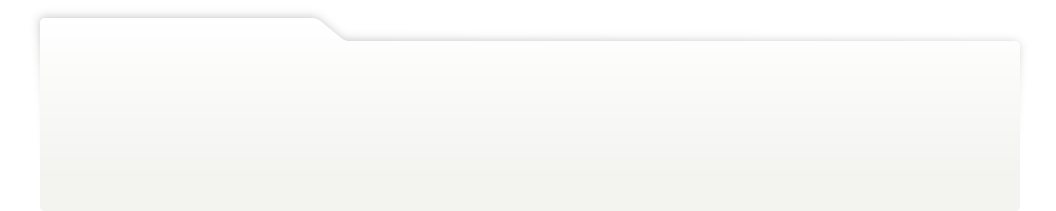
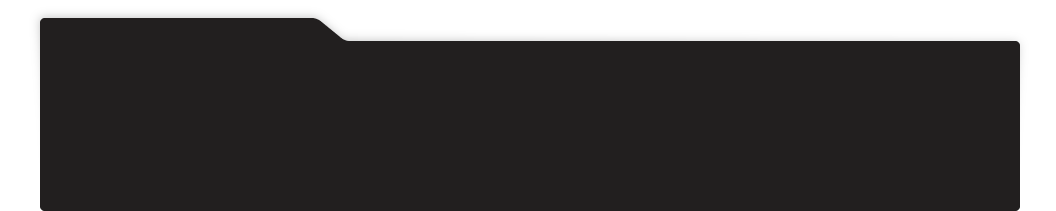
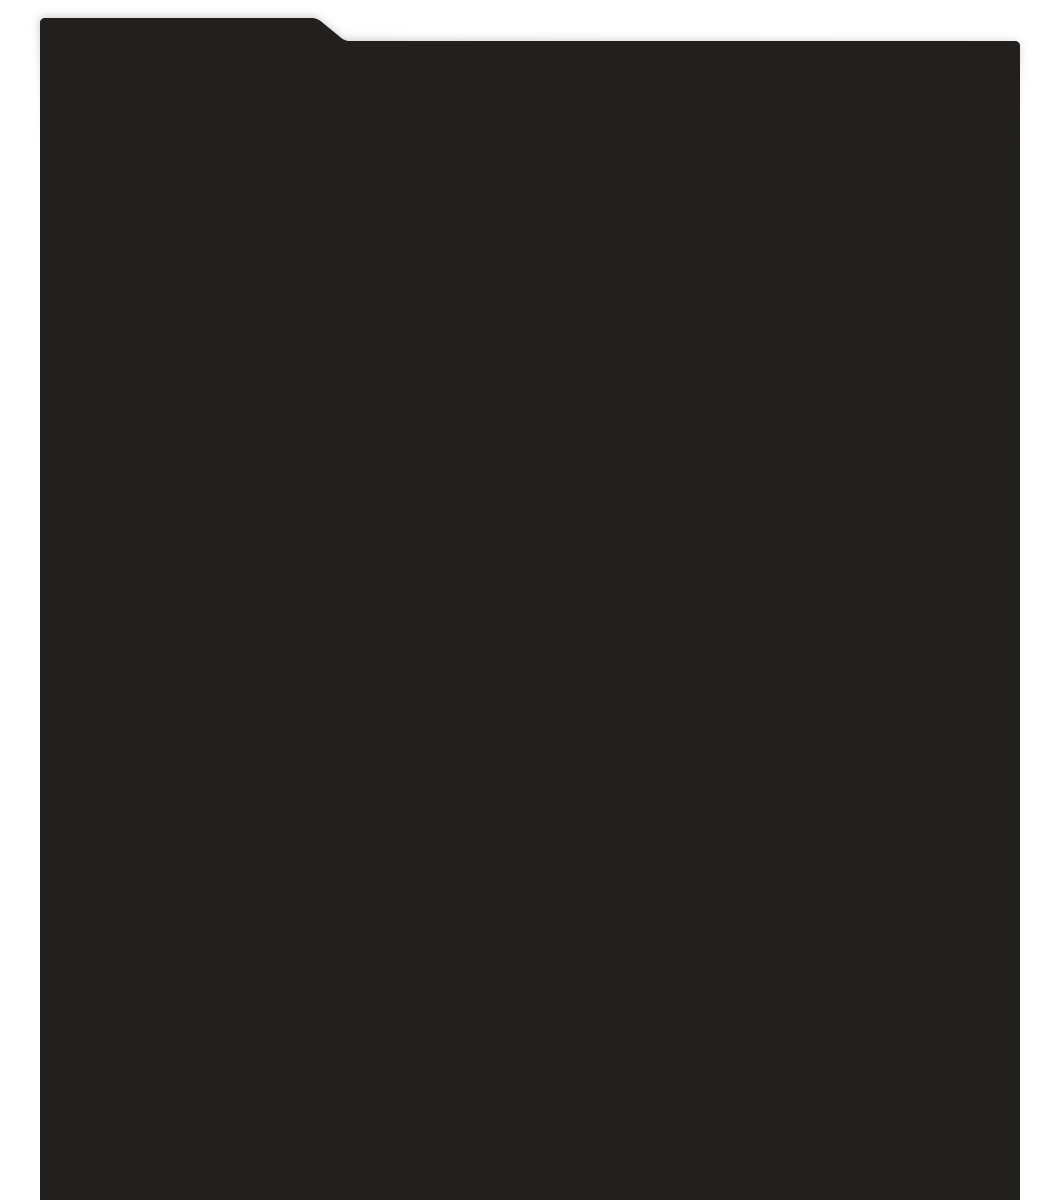
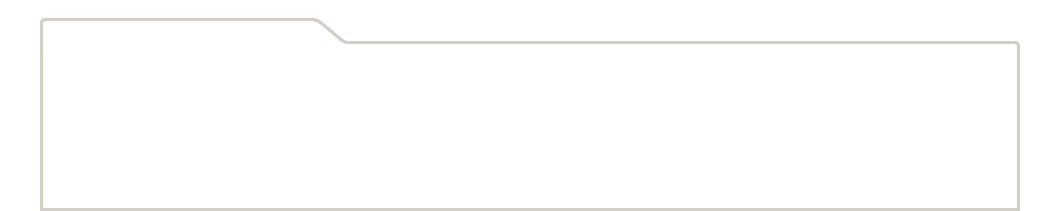
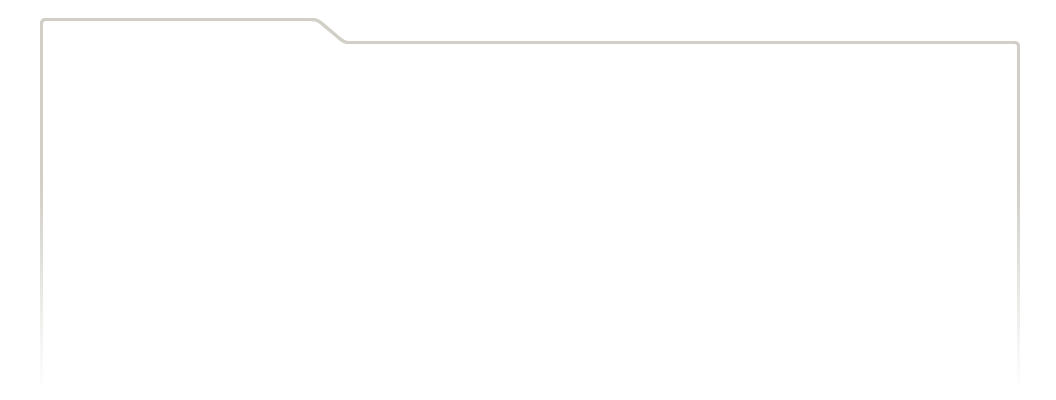
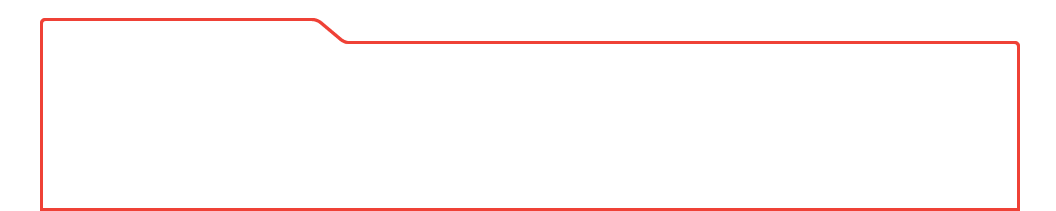
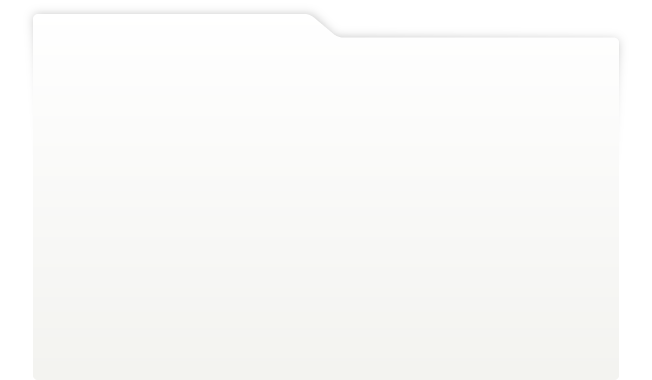
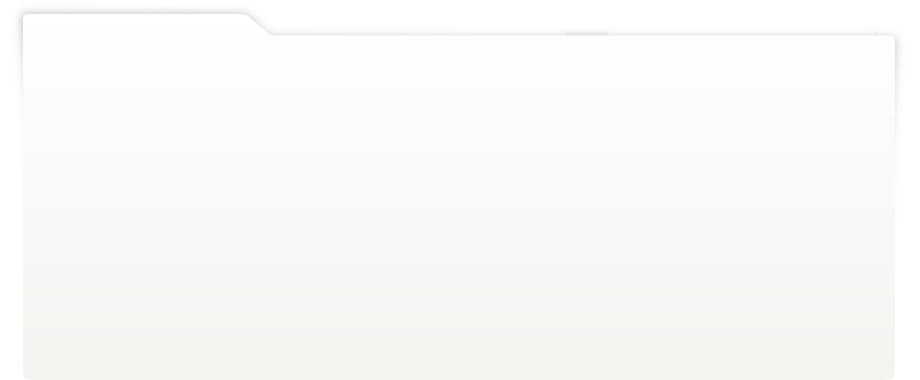
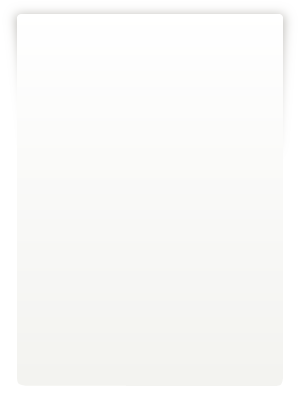
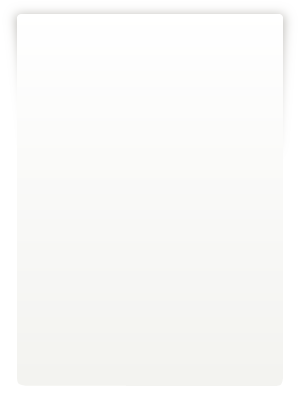
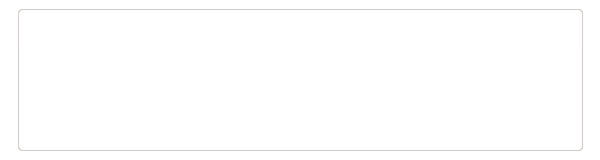
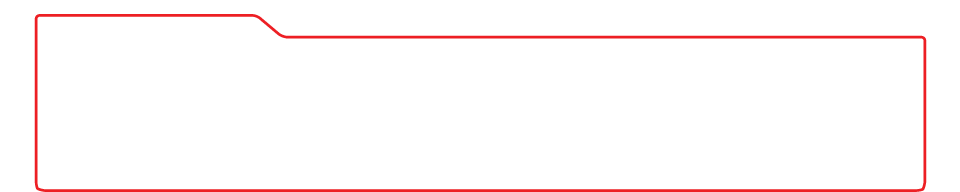
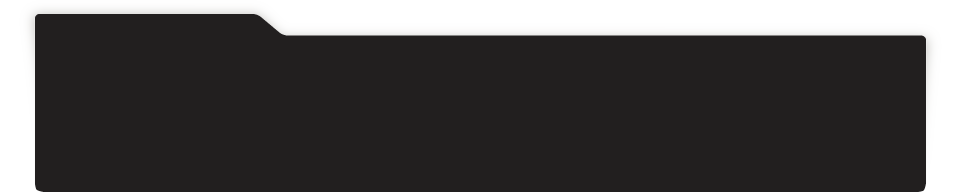
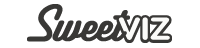
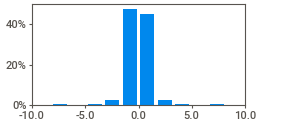
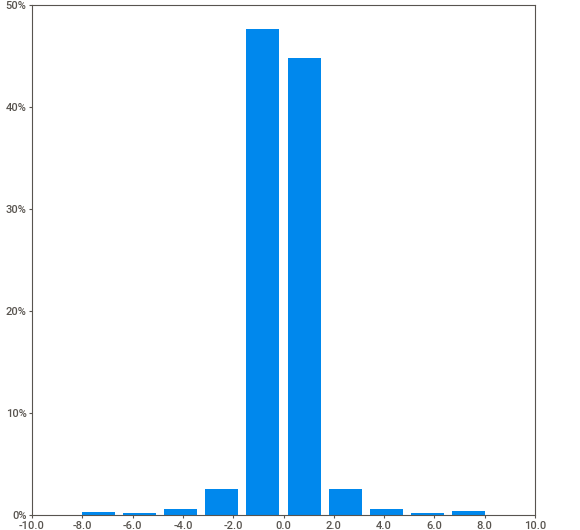
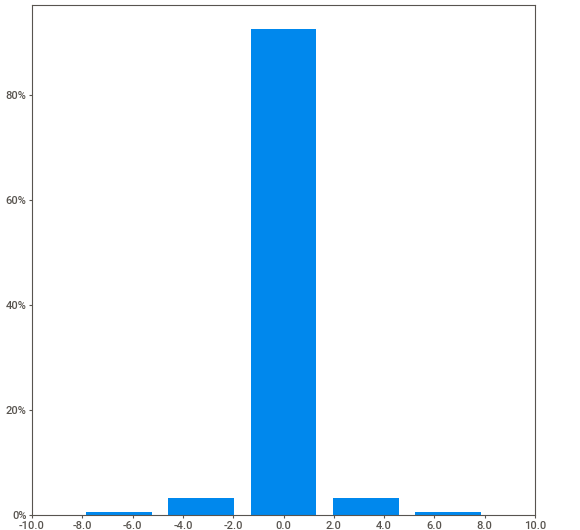
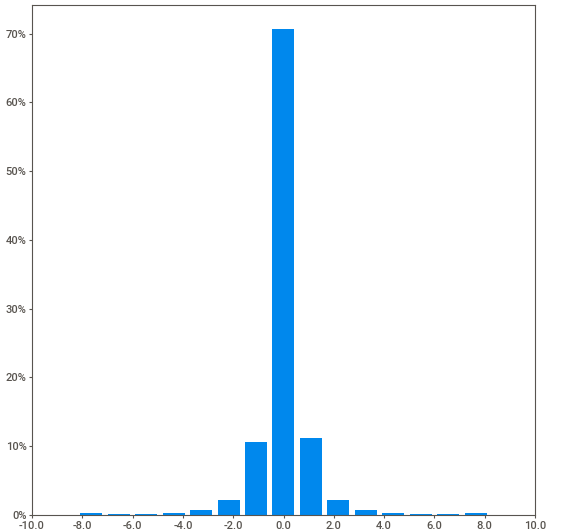
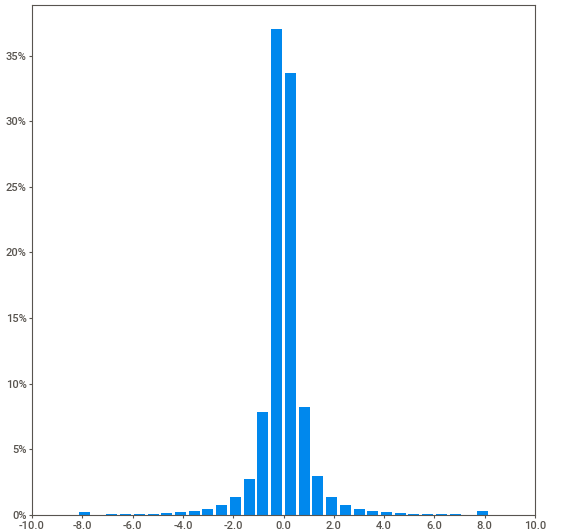
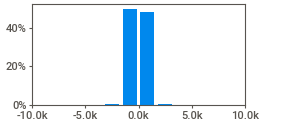
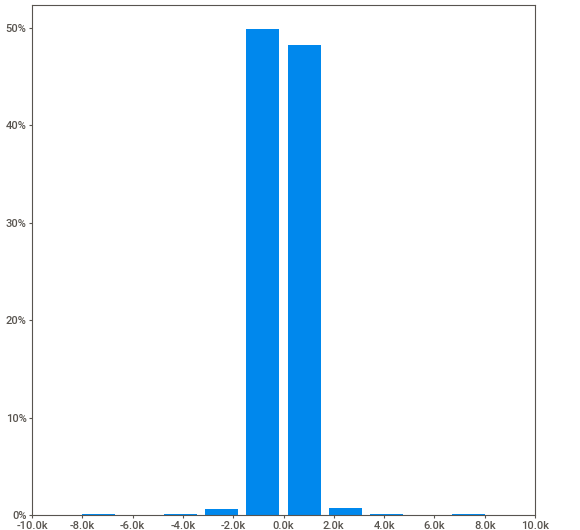
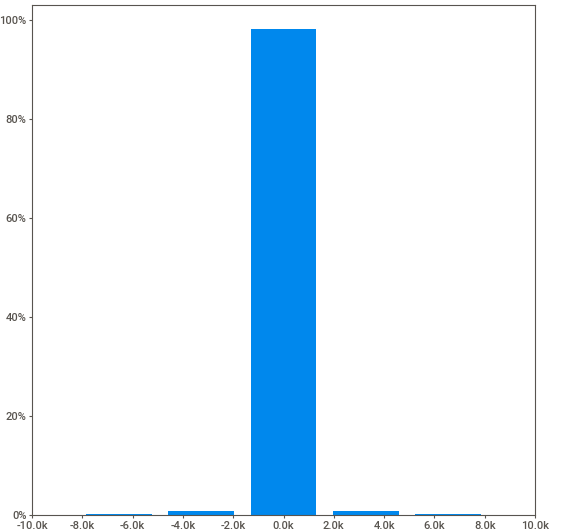
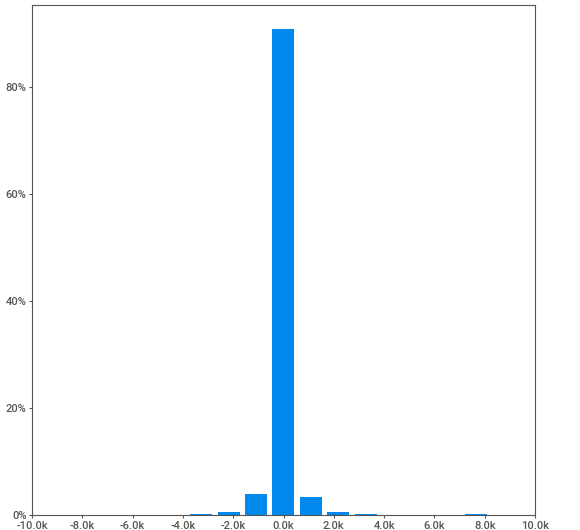
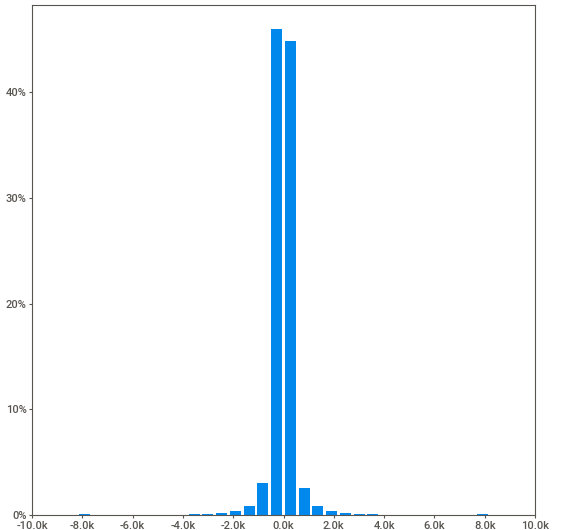
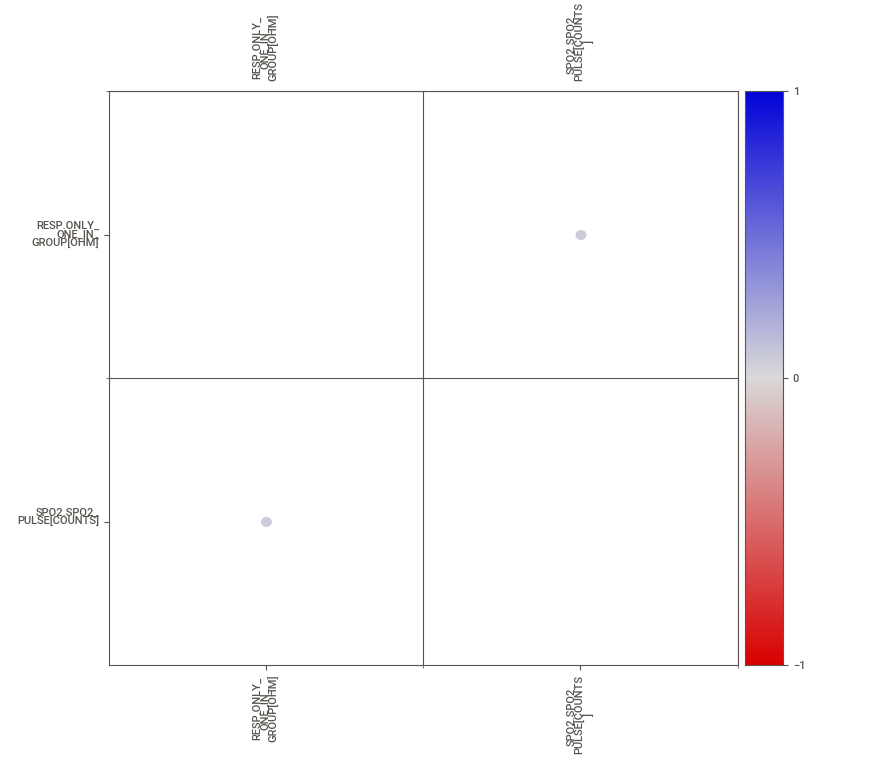
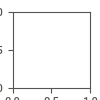

In [17]:
import sweetviz as sv
orig_data_report = sv.analyze(FinalData, pairwise_analysis = 'on')
orig_data_report.show_notebook()

In [18]:
import math
import numpy as np
np_data = FinalData.to_numpy()
labels = State.to_numpy()
labels.astype('int')
nb_timestamps, nb_sensors = np_data.shape
window_size = 60 # Size of the data segments
timestamp_idx = 0 # Index along the timestamp dimension
segment_idx = 0 # Index for the segment dimension


nb_segments = int(math.floor(nb_timestamps/window_size))
print('Starting segmentation with a window size of %d resulting in %d segments ...' % (window_size,nb_segments))
data_to_save = np.zeros((nb_segments,window_size,nb_sensors),dtype=np.float32)
labels_to_save = np.zeros(nb_segments,dtype=int)

while segment_idx < nb_segments:
    data_to_save[segment_idx] = np_data[timestamp_idx:timestamp_idx+window_size,:]
    # Check the majority label ocurring in the considered window
    current_labels = labels[timestamp_idx:timestamp_idx+window_size]
    values, counts = np.unique(current_labels, return_counts=True)
    labels_to_save[segment_idx] = values[np.argmax(counts)]
    timestamp_idx += window_size
    segment_idx += 1

Starting segmentation with a window size of 60 resulting in 9635 segments ...


In [19]:
data_to_save

array([[[-1.550e-01, -4.500e+01],
        [-1.120e-01,  1.380e+02],
        [ 5.930e-01, -1.560e+02],
        ...,
        [ 3.601e+00, -1.910e+02],
        [ 1.438e+00, -7.960e+02],
        [ 4.190e-01,  7.760e+02]],

       [[ 5.350e-01, -2.980e+02],
        [-1.768e+00,  1.120e+02],
        [-7.440e-01,  4.510e+02],
        ...,
        [ 1.650e+00,  5.400e+01],
        [-5.360e-01, -3.420e+02],
        [-6.740e-01, -4.980e+02]],

       [[ 1.070e-01,  1.640e+02],
        [-1.120e-01,  2.440e+02],
        [ 8.600e-02,  5.000e+00],
        ...,
        [-4.150e-01, -1.110e+02],
        [ 8.670e-01, -3.200e+01],
        [-2.850e-01,  0.000e+00]],

       ...,

       [[ 1.160e+00,  9.600e+01],
        [ 1.500e-01,  1.150e+02],
        [ 6.820e-01,  2.690e+02],
        ...,
        [-1.505e+00,  0.000e+00],
        [-1.185e+00,  0.000e+00],
        [-8.530e-01, -6.813e+03]],

       [[ 1.057e+00,  1.469e+03],
        [ 6.120e-01, -9.710e+02],
        [-1.702e+00,  2.340e+02],
        .

In [20]:
shuffler = np.random.permutation(len(data_to_save))
data_to_save_shuffled = data_to_save[shuffler]
labels_to_save_shuffled = arr_2[labels_to_save]

NameError: name 'arr_2' is not defined